# 개요
크롤링/스크래핑을 위한 파이썬 프레임워크. 단순한 라이브러리 제공이 아닌 크롤링에 필요한 여러 공통적인 작업들을 내부적으로 처리해준다. 그래서 공통적 작업은 scrapy에 맞기고 개발자는 데이터 추출의 본질적인 작업에만 집중할 수 있다. 
scrapy는 웹사이트 다운로드 처리를 비동기적 방식으로 처리하여 속도가 매우 빠르다.
프레임워크이므로 주어진 틀에 맞춰 프로그램을 작성해야기 때문에 약간에 진입 장벽이 있다.

- 공식홈페이지: https://scrapy.org/
- documentation : https://docs.scrapy.org/en/latest/

## 설치
- `pip install scrapy`
- `conda install -c conda-forge scrapy`

scrapy startproject exam01

## Scrapy Project
- scrapy 는 프로젝트 단위로 개발한다.

### 프로젝트 생성
- `scrapy startproject 프로젝트이름`




### 프로젝트 구조

**<font color='red'>my_crawler</font>**    
&nbsp;&nbsp;├── **<font color='red'>my_crawler</font>**    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── \_\_init\_\_.py    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── <font color='red'>\_\_pycache\_\_</font>    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── items.py     
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── middlewares.py    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── pipelines.py    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;├── settings.py    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;└── **<font color='red'>spiders</font>**    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;├── \_\_init\_\_.py    
&nbsp;&nbsp;│&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;└── <font color='red'>\_\_pycache\_\_</font>    
&nbsp;&nbsp;└── scrapy.cfg    

- ### Spider클래스
    - 웹사이트의 크롤링을 담당하는 클래스
    - 보통 대상 웹사이트마다 Spider를 만든다.
        - **spiders 디렉토리**에 파이썬 스크립트 파일을 작성한다. 
        - 파이썬스크립트 파일 생성
            - `scrapy genspider 스파이더이름 도메인`
    
- ### Item
    - spider가 추출할 데이터를 저장할 객체
    - **items.py** 에 구현한다.
- ### Item Pipeline
    - Spider가 추출한 Item을 받아 다양한 처리를 하는 컴포넌트
    - 여러개를 만들 수도 있고 안만들 수도 있다.
    - **pipelines.py** 에 클래스를 정의 하며 settings.py에 등록해야 한다.
        - 여러개를 등록하면 순서대로 실행되며 처리한 item 을 다음 pipeline에 전달해 처리하도록 한다.
    - 다음과 같은 일을 주로 구현한다.
        - 추출한 데이터 검증
        - 추출한 데이터를 DB 등에 저장
        - 중복 체크
- ### settings.py
    - scrapy 프로젝트와 관련된 설정 파일
- ### middlewares.py
    - Downloader middleware, Spider Middleware 확장 클래스들을 작성

## 아키텍처
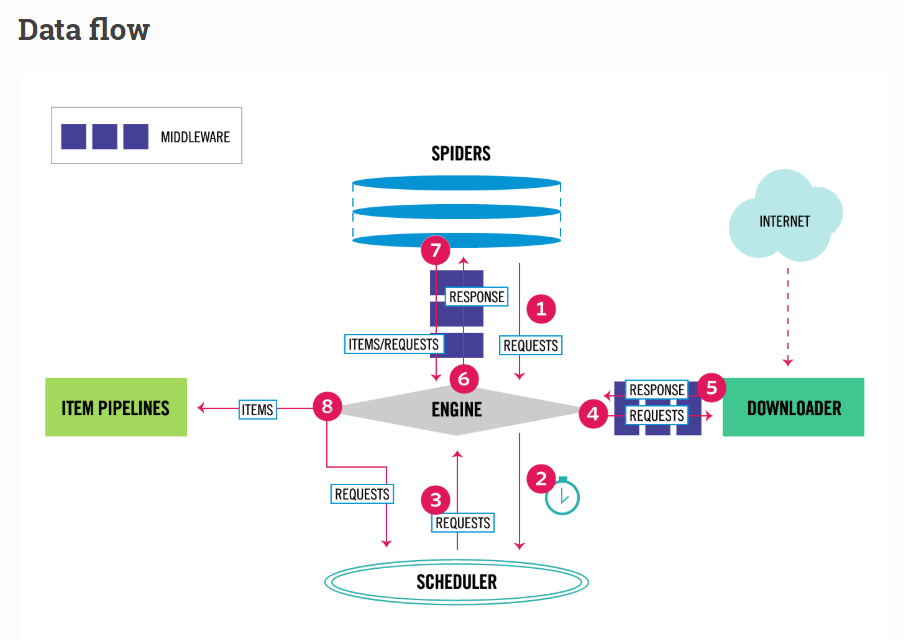

**1-2.** Spider를 실행하면 시작 url들(start_urls속성 또는 start_requests) 의 Request 객체가 Scheduler에 전달되며 Scheduler의 대기 큐(Queue)에 추가된다.    
**3-5.** 큐에 추가된 Request는 차례대로 Downloader에 전달 되어 지정된 URL에서 페이지를 추출하고 그 결과로 Response 객체를 생성한다.    
**6.** Scrapy Engin은 Spider의 콜백 메소드를 호출하면서 Response를 전달한다.    
**7-8.** 콜백 메소드가 Request를 yield 하면 Scheduler로 전달하면서 위의 3-6을 반복한다.    
     콜백 메소드가 Item을 yield 하면 등록된 Pipeline들에 순서대로 전달된다.     
**9.** Pipeline을 거친 Item 은 결과 로그로 출력된다.      

## 값 추출
- Response객체의 메소드 이용한다.
- ### css selector 이용
    - **response.css("css selector")** 메소드
    - text 조회
        - ::text
        - `a::text`
    - 태그의 속성값 조회
        - ::attr(속성명)
        - `a::attr(href)`
- ### xpath
    - **response.xpath("xpath")** 메소드
- ### 조회결과
    - 두 메소드 모두 SelectorList 를 결과로 반환한다.
    - Selector
        - 조회된 element 하나를 표현하는 객체
    - SelectorList 
        - 조회결과들을 리스트(SelectorList)로 묶어서 반환한다
        - getall() / extract()
            - 조회결과를 문자열로 변환해 List로 반환
        - get() / extract_first()
            - SelectorList의 첫번째 원소만 문자열로 변환해 반환
            - 조회결과가 하나일 경우 사용
        

>## xpath 문법
- 참고
    - https://developer.mozilla.org/ko/docs/Web/XPath
    - https://www.w3schools.com/xml/xpath_syntax.asp
>
>## xpath 개요
- xml(html)에서 원하는 태그나 속성등을 path(경로) 형식으로 찾는 문법
>
>## 구문
>
> - `/` 로 시작 - root 노드를 시작 위치로 지정
> - `//` 로 시작 : XML(HTML) 문서의 모든 위치를 시작 위치로 지정. 전체 문서내에서 찾는다.
> ```
> /html/body/a
> //a
> ```
> 
> - `*` : 모든 element(태그)
> - 태그명: 지정한 태그명의 element선택
> - `@` : 속성을 선택하기 위한 지시자
>     - div[@id] - id 속성을 가진 div
>     - *[@class='cls'] - class속성의 값이 cls인 모든 태그
>     
> - `[표현식]` : 표현식 조건에 해당하는 노드들 선택 
>     - index: div[1] - div중 1번째 것    
>     - 속성: div[@id="test"] - div중 id속성이 "test" 인것
> - `/` : 하위 element 구분자
> - `.`:  현재 element 선택
> - `..`: 상위 element 선택 
> - `not` : not(조건) - 조건이 아닌 것 선택
> 
> - 예
>     - `//table/tbody/tr/td`
>     - `//table/tbody/tr[1]/td`
>     - `//div[@class]`
>     - `//div[not(@class)]`
>     - `//ul[@class="list"]/li`
>     - `//div["@id='contents']/a/@href` 
>     - `//div["@id='contents']/a/text()`
>     - `//*[@id="topic"]/li/a/strong`

## Scrapy Shell 로 데이터 추출 테스트
- 코드를 작성하기 전에 데이터를 추출하려는 페이지에서 xpath나 css 셀렉터를 테스트 해볼 수있는 scrapy 제공 shell

### scrapy shell 실행
- 명령프롬프트에서 다음과 같이 실행
    - scrapy shell [테스트할 페이지 url]    

```
scrapy shell https://news.daum.net
```

### scrapy shell 제공 객체변수 및 함수
- request : 요청정보를 가지고 있는 Request객체를 참조하는 제공 변수
- response: 요청에 대한 응답 정보를 가지고 있는 Response 객체를 참조하는 제공 변수
    - response객체를 이용해 css selector나 xpath로 element 추출을 테스트할 수 있다.
    - response.css(), response.xpath()
- fetch(url) : 새로운 요청을 한다.
- view(response) : 매개변수로 지정한 Response객체의 내용(응답받은 내용)을 웹브라우저에 띄운다

#### 예제
```python
request.url     # 요청 url
request.method  # 요청방식
request.headers # 요청 헤더

response.url    # 응답받은 url
response.status # 응답 상태코드
response.text

view(response)
fetch(새 url)
```

## 프로젝트 실행(Spider 실행) 
- ### `scrapy crawl [스파이더이름] [옵션]`

### 주요 옵션
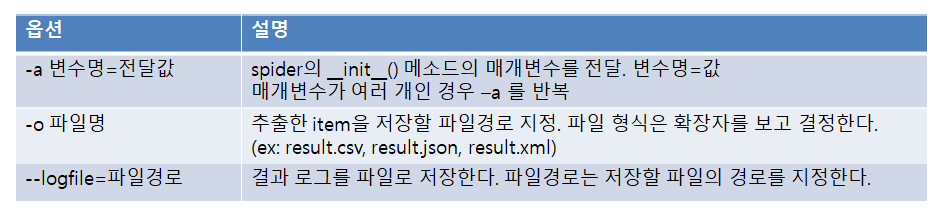

#### __init__() 에 매개변수 전달
- `scrapy crawl coupang_search -a keyword=coffee`
- `scrapy crawl coupang_search -a keyword=coffee -a num=100` 
    - 매개변수가 여러개인 경우 -a name=value를 반복

#### 크롤링 결과 파일로 저장
- `scrapy crawl coupang_search -o result.csv`
- `scrapy crawl coupang_search -a keyword=coffee -o result.csv`

#### 결과 로그 파일로 저장
- `scrapy crawl coupang_search -o result.csv --logfile=result.log`

In [26]:
def test_generator():
    print("g", 1)
    yield 1
    print("g", 2)
    yield 2
    print("g", 3)
    yield 3
    

In [27]:
v = test_generator()
print(v)

<generator object test_generator at 0x0000016056956B48>


In [28]:
next(v)

g 1


1

In [29]:
next(v)

g 2


2

In [30]:
next(v)

g 3


3

In [31]:
next(v)

StopIteration: 

In [32]:
t = test_generator()

In [34]:
for i in t:
    print(i)

g 1
1
g 2
2
g 3
3
